<a href="https://colab.research.google.com/github/PestanaSH/Machine-Learning-Studies/blob/main/anomaly_detection_with_k_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist

In [ ]:
df = pd.read_csv('cybersecurity_intrusion_data.csv')
df.columns

Index(['session_id', 'network_packet_size', 'protocol_type', 'login_attempts',
       'session_duration', 'encryption_used', 'ip_reputation_score',
       'failed_logins', 'browser_type', 'unusual_time_access',
       'attack_detected'],
      dtype='object')

In [ ]:
X = df[['login_attempts', 'session_duration', 'failed_logins',
            'ip_reputation_score', 'network_packet_size']].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

wcss = []
for i in range(1, 11):
    # Instancia o modelo K-means
    # O random_state garante que os resultados sejam reproduzíveis
    kmeans_model = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)

    # Treina o modelo com os dados padronizados
    kmeans_model.fit(X_scaled)

    # Adiciona a inércia (WCSS) à lista
    wcss.append(kmeans_model.inertia_)

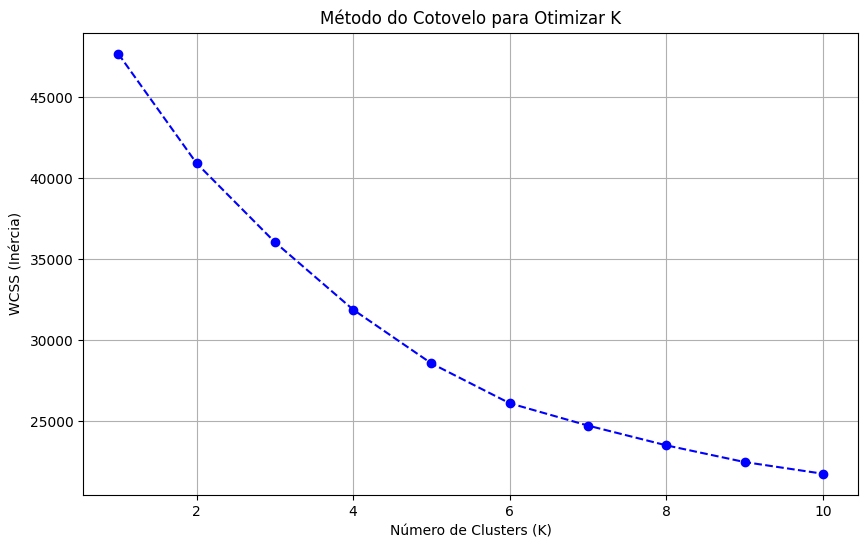

Gráfico do Cotovelo gerado.


In [ ]:
# Cria o gráfico
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--', color='blue')
plt.title('Método do Cotovelo para Otimizar K')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('WCSS (Inércia)')
plt.grid(True)
plt.show()

print("Gráfico do Cotovelo gerado.")

In [ ]:
K_ideal = 3

kmeans_anomaly = KMeans(n_clusters=K_ideal, random_state=42, n_init=10)
kmeans_anomaly.fit(X_scaled)

KMeans(n_clusters=3, n_init=10, random_state=42)

In [ ]:
# 1. Calcula a matriz de distancia (pontos x K centroides)
distancias_para_centroides = cdist(X_scaled, kmeans_anomaly.cluster_centers_, metric='euclidean')

# 2. Obtem a menor distancia para cada ponto (o score de anomalia)
df['Distancia_Minima'] = np.min(distancias_para_centroides, axis=1)

# 3. Define o limite (Threshold) para ser classificado como anomalia
# Usamos Media + 3 Desvios Padrao para ser conservador e pegar outliers extremos
limite = df['Distancia_Minima'].mean() + 3 * df['Distancia_Minima'].std()

df['Anomalia'] = df['Distancia_Minima'] > limite

In [ ]:
# --- Certifique-se de que a lista 'features' esteja definida ---
features = [
    'login_attempts',
    'session_duration',
    'failed_logins',
    'ip_reputation_score',
    'network_packet_size'
]
# --------------------------------------------------------------

anomalias_detectadas = df[df['Anomalia'] == True]

print(f"Total de {len(anomalias_detectadas)} atividades anômalas detectadas.")
print("\nCaracterísticas médias das Anomalias (Comparar com o Normal):")
print(anomalias_detectadas[features].mean()) # Agora 'features' está definida!

Total de 88 atividades anômalas detectadas.

Características médias das Anomalias (Comparar com o Normal):
login_attempts            6.772727
session_duration       2523.253771
failed_logins             2.568182
ip_reputation_score       0.380725
network_packet_size     602.125000
dtype: float64
